# Projet Audio:

In [9]:
import os
import librosa
import gzip
import shutil
import pandas as pd

In [18]:
def un_zipFiles(path):
    text_file_name=[]
    text_data=[]
    
    audio_file_name=[]
    audio_path=[]
    
    files=os.listdir(path)
    for file in files:
            
        if file.endswith('WAV.gz') or file.endswith('TXT.gz'):
            with gzip.open(file, 'rb') as f_in:
                with open(file[:-3], 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
                    
                if file.endswith('TXT.gz'):
                    #filePath=path+'/'+file
                    zip_file = gzip.open(file)

                    #get text data: 
                    file_content = zip_file.read()

                    #close zip:
                    zip_file.close()
                    
                    #insert data:
                    text_file_name.append(file[:-3])
                    text_data.append(file_content)
                    
                elif file.endswith('WAV.gz'):
                    audio_file_name.append(file[:-3])
                    audio_path.append(path+"\\"+file[:-3])
                
        else:
            #ne pas extraire les fichiers non intéressants
            pass
    

    return text_file_name, text_data, audio_file_name, audio_path

In [19]:
#datalist:
text_name=[]
text_data=[]
audio_name=[]
audio_path=[]

#dataframe:
df_data=pd.DataFrame()


#data extraction:
abs_path=r"C:\Users\HP\Desktop\projet_audio"
os.chdir(abs_path)

os.chdir("./DATA/TRAIN/")
train_dir=os.listdir(os.getcwd())
print("all directories in train : ",train_dir)


#parcourir les 8 DR
for DR in train_dir:
    path_DR=str(os.getcwd())+"\\"+DR
    os.chdir(DR)
    #print("Current path DR : ",os.getcwd())
    
    #list dir folders and files:
    folders=os.listdir(path_DR)
    #print("all directories in {} : {}".format(DR,folders))
    
    #parcourir les dossiers dans chaque DR:
    for folder_i in folders:
        #path to folder
        path_folder=str(os.getcwd())+"\\"+folder_i
        
        #change directory:
        os.chdir(path_folder)
        #print("Current path Folder : ",os.getcwd())

        
        #list all zip files: 
        ziped_files=os.listdir(os.getcwd())
        #print("all files in {} : {}".format(folder_i,ziped_files))
        
        #unzip files:
        text_name_ , text_data_ , audio_name_ , audio_path_ = un_zipFiles(path_folder)
        
        #concatinate lists:
        text_name+=text_name_ 
        text_data+=text_data_ 
        audio_name+=audio_name_
        audio_path+=audio_path_
        
        #revenir au folder:
        os.chdir("../")

    
    #revenir au dir DR
    os.chdir("../")

#revenir au dir Train
os.chdir("../")

all directories in train :  ['DR1', 'DR2', 'DR3', 'DR4', 'DR5', 'DR6', 'DR7', 'DR8']


In [20]:
print(len(text_name))
print(len(text_data))
print(len(audio_name))
print(len(audio_path))

#out put data:
df=pd.DataFrame({"text_name":text_name,"text_data":text_data,"audio_name":audio_name,"audio_path":audio_path})
df

4620
4620
4620
4620


,text_name,text_data,audio_name,audio_path
0,SA1.TXT,b'0 46797 She had your dark suit in greasy was...,SA1.WAV,C:\Users\HP\Desktop\projet_audio\DATA\TRAIN\DR...
1,SA2.TXT,"b""0 34509 Don't ask me to carry an oily rag li...",SA2.WAV,C:\Users\HP\Desktop\projet_audio\DATA\TRAIN\DR...
2,SI1027.TXT,"b'0 49460 Even then, if she took one step forw...",SI1027.WAV,C:\Users\HP\Desktop\projet_audio\DATA\TRAIN\DR...
3,SI1657.TXT,b'0 45466 Or borrow some money from someone an...,SI1657.WAV,C:\Users\HP\Desktop\projet_audio\DATA\TRAIN\DR...
4,SI648.TXT,b'0 57856 A sailboat may have a bone in her te...,SI648.WAV,C:\Users\HP\Desktop\projet_audio\DATA\TRAIN\DR...
...,...,...,...,...
4615,SX172.TXT,b'0 44954 The triumphant warrior exhibited nai...,SX172.WAV,C:\Users\HP\Desktop\projet_audio\DATA\TRAIN\DR...
4616,SX262.TXT,b'0 38196 Can the agency overthrow alien force...,SX262.WAV,C:\Users\HP\Desktop\projet_audio\DATA\TRAIN\DR...
4617,SX352.TXT,b'0 63284 According to my interpretation of th...,SX352.WAV,C:\Users\HP\Desktop\projet_audio\DATA\TRAIN\DR...
4618,SX442.TXT,b'0 56730 Suburban housewives often suffer fro...,SX442.WAV,C:\Users\HP\Desktop\projet_audio\DATA\TRAIN\DR...


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [22]:
print(df.loc[0,"audio_path"])

x, sr = librosa.load(df.loc[1,"audio_path"], sr=16000)

#to write a new wave: 
#sf.write('tmp.wav', x, 16000)
#wave.open('tmp.wav','r')
#display(Audio(x,rate=16000))

C:\Users\HP\Desktop\projet_audio\DATA\TRAIN\DR1\FCJF0\SA1.WAV


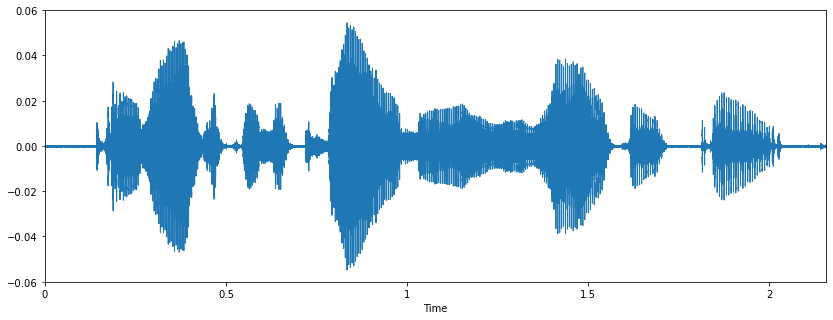

In [23]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

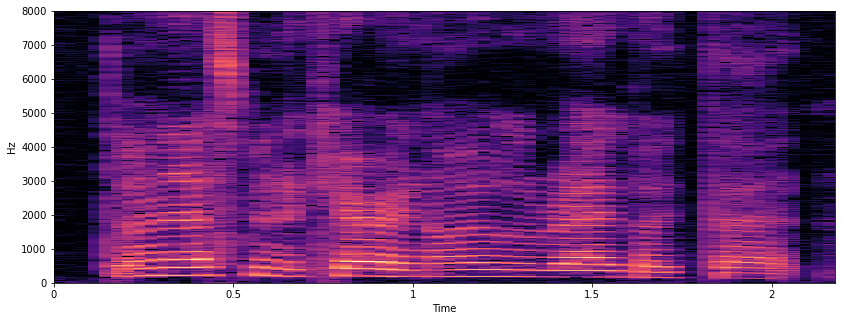

In [24]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [25]:
import IPython.display as ipd
ipd.Audio(x, rate=sr) 